In [1]:
!pip install gluonnlp pandas tqdm   
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp39-cp39-linux_x86_64.whl size=680545 sha256=41563043919bde4e276db3d05e273ea3a4d7c53d8945693050ba27bb297322cf
  Stored in directory: /root/.cache/pip/wheels/47/17/70/b257bc53879a458c4bfcc900e89271aa8b4f19366a54bd2455
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-tvmg9orn/kobert-tokenizer_4d322dfe06d84b138f45b2b3396a64a7
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-tvmg9orn/kobert-tokenizer_4d322dfe06d84b138f45b2b3396a64a7
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4645 sha256=09ef05ad792f48eb4010ed8a7db8d3ef63d50f596f793945d99df9b5247ee9d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-03w19thi/wheels/64/c4/82/d70d864682468fad0bf8269b0dfd88daf48f209be4c8ade164
Successfully built kobert_tokenizer


In [3]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-rirsz1ug
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-rirsz1ug
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from kobert_tokenizer import KoBERTTokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_pytorch_kobert_model()

Downloading:   0%|          | 0.00/371k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/244 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/432 [00:00<?, ?B/s]

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [5]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

#GPU 사용 시
device = torch.device("cuda:0")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [8]:
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/data/train.csv'
data = pd.read_csv(data_path)

In [9]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

data = data.replace(label_dict)
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [10]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,vocab, max_len,
                 pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

In [11]:
# Setting parameters
max_len = 128
batch_size = 64
warmup_ratio = 0.1
num_epochs = 30
max_grad_norm = 1
log_interval = 200 # -> interval 줄이기 (42니까 20 정도로?)
learning_rate =  5e-5

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, 
    random_state=2023, stratify=data['label'])

In [13]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, 
    random_state=2023, stratify=y_train)

In [14]:
dataset_train = []
for sen, label in zip(x_train, y_train):
    dataset_train.append((sen, str(label)))
dataset_val = []
for sen, label in zip(x_val, y_val):
    dataset_val.append((sen, str(label)))
dataset_test = []
for sen, label in zip(x_test, y_test):
    dataset_test.append((sen, str(label)))

In [15]:
tk = tokenizer.tokenize
data_train = BERTDataset(dataset_train, 0, 1, tk, vocab, max_len, True, False)
data_val = BERTDataset(dataset_val, 0, 1, tk, vocab, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tk, vocab, max_len, True, False)

In [16]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [17]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [18]:
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
 
#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [19]:
train_history=[]
val_history=[]
loss_history=[]
for e in range(num_epochs):
    train_acc = 0.0
    val_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    #train_history.append(train_acc / (batch_id+1))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        val_acc += calc_accuracy(out, label)
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
    val_history.append(val_acc / (batch_id+1))

<ipython-input-19-cea2fb8da03b>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.6639890670776367 train acc 0.203125
epoch 1 train acc 0.3669019933554817


<ipython-input-19-cea2fb8da03b>:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 1 val acc 0.4565548780487805


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 1.2872134447097778 train acc 0.4375
epoch 2 train acc 0.5781769102990033


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 2 val acc 0.6779725609756098


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.8693177700042725 train acc 0.734375
epoch 3 train acc 0.7693625415282392


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 3 val acc 0.7929878048780488


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.46201974153518677 train acc 0.859375
epoch 4 train acc 0.8673778377630121


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 4 val acc 0.8256097560975609


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.2601900100708008 train acc 0.953125
epoch 5 train acc 0.9027287513842747


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 5 val acc 0.7404725609756098


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.3082346022129059 train acc 0.890625
epoch 6 train acc 0.8876747646733113


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 6 val acc 0.8273628048780488


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.33086588978767395 train acc 0.90625
epoch 7 train acc 0.9443867663344407


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 7 val acc 0.813109756097561


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.1911543607711792 train acc 0.953125
epoch 8 train acc 0.9488597037652271


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 8 val acc 0.7992378048780487


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.22265943884849548 train acc 0.921875
epoch 9 train acc 0.956481866002215


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 9 val acc 0.8134908536585366


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.045417241752147675 train acc 0.984375
epoch 10 train acc 0.9732142857142857


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 10 val acc 0.8221036585365853


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.02497927099466324 train acc 1.0
epoch 11 train acc 0.9832589285714286


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 11 val acc 0.8019817073170732


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.009027304127812386 train acc 1.0
epoch 12 train acc 0.9888392857142857


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 12 val acc 0.8176067073170732


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.00936593022197485 train acc 1.0
epoch 13 train acc 0.9910714285714286


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 13 val acc 0.8363567073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.004571650642901659 train acc 1.0
epoch 14 train acc 0.9933035714285714


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 14 val acc 0.8207317073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.004506547469645739 train acc 1.0
epoch 15 train acc 0.9951723421926911


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 15 val acc 0.8363567073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.0031694930512458086 train acc 1.0
epoch 16 train acc 0.9977678571428571


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 16 val acc 0.8488567073170732


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.0026981746777892113 train acc 1.0
epoch 17 train acc 0.9981398809523809


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 17 val acc 0.8332317073170732


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.025702927261590958 train acc 0.984375
epoch 18 train acc 0.9988839285714286


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 18 val acc 0.8238567073170732


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.08337914198637009 train acc 0.984375
epoch 19 train acc 0.9985119047619048


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 19 val acc 0.8238567073170732


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.0019947828259319067 train acc 1.0
epoch 20 train acc 0.9992559523809523


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 20 val acc 0.8301067073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 21 batch id 1 loss 0.0016363547183573246 train acc 1.0
epoch 21 train acc 0.9996279761904762


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 21 val acc 0.834984756097561


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 22 batch id 1 loss 0.0016900867922231555 train acc 1.0
epoch 22 train acc 0.9992559523809523


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 22 val acc 0.8332317073170732


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 23 batch id 1 loss 0.0014223622856661677 train acc 1.0
epoch 23 train acc 0.9996279761904762


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 23 val acc 0.8363567073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 24 batch id 1 loss 0.0018916233675554395 train acc 1.0
epoch 24 train acc 0.9992559523809523


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 24 val acc 0.8301067073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 25 batch id 1 loss 0.0017768198158591986 train acc 1.0
epoch 25 train acc 0.9996279761904762


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 25 val acc 0.8363567073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 26 batch id 1 loss 0.0017160611459985375 train acc 1.0
epoch 26 train acc 0.9996279761904762


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 26 val acc 0.8363567073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 27 batch id 1 loss 0.001682478585280478 train acc 1.0
epoch 27 train acc 0.9996279761904762


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 27 val acc 0.8363567073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 28 batch id 1 loss 0.0013686979655176401 train acc 1.0
epoch 28 train acc 0.9996279761904762


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 28 val acc 0.8363567073170731


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 29 batch id 1 loss 0.0014563837321475148 train acc 1.0
epoch 29 train acc 0.9996279761904762


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 29 val acc 0.8332317073170732


  0%|          | 0/42 [00:00<?, ?it/s]

epoch 30 batch id 1 loss 0.0016383319161832333 train acc 1.0
epoch 30 train acc 0.9996279761904762


  0%|          | 0/5 [00:00<?, ?it/s]

epoch 30 val acc 0.8332317073170732


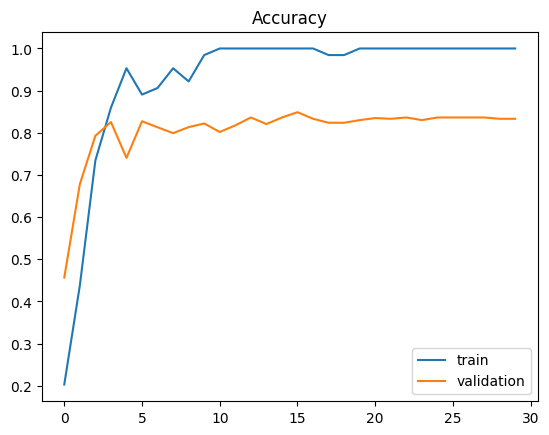

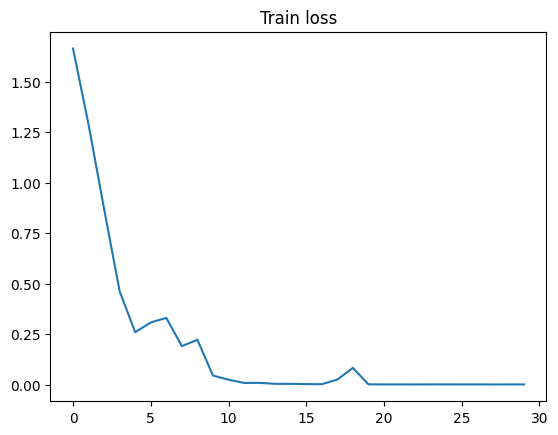

In [20]:
plt.title('Accuracy')
plt.plot(train_history, label='train')
plt.plot(val_history, label='validation')
plt.legend()
plt.show()

plt.title('Train loss')
plt.plot(loss_history)
plt.show()

In [22]:
model.eval()
test_acc = 0.0
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
    token_ids = token_ids.long().to(device)
    segment_ids = segment_ids.long().to(device)
    valid_length= valid_length
    label = label.long().to(device)
    out = model(token_ids, valid_length, segment_ids)
    test_acc += calc_accuracy(out, label)
print("test acc {}".format(test_acc / (batch_id+1)))

<ipython-input-22-e1748caaca4d>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/12 [00:00<?, ?it/s]

test acc 0.8414884868421053


In [30]:
reverse_label = {}
for k, v in label_dict.items():
    reverse_label[v] = k

In [43]:
def predict(predict_sentence):
    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tk, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        logits=out[0]
        logits = logits.detach().cpu().numpy()
        pred = np.argmax(logits)
        print(f'>> 분류 결과 : {reverse_label[pred]}')

In [46]:
predict("tokenization은 어떤 역할을 하나요?")

>> 분류 결과 : 이론


In [47]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 이론


In [54]:
x_train.iloc[0]

'label을 50:50정도의 비율로 나누지 않고 데이터처리해도 괜찮은건가요?\n어떤 경우에 50 : 50의 비율로 나누어서 데이터처리를 해주는거낙요?'

In [62]:
predict(x_test.iloc[4])

>> 분류 결과 : 코드2


In [68]:
for i in range(5):
    print(f"질문 : {x_test.iloc[i]}")
    print(f"label : {reverse_label[y_test.iloc[i]]}")
    predict(x_test.iloc[i])
    print()
    print()

질문 : class Profile(models.Model):
    User = models.OneToOneField(User, on_delete=models.CASCADE)
    phone_number = models.CharField(max_length=20)
    address = models.CharField(max_length=50)

와 같이 작성했고 정상적으로 따라갔으며
profile 페이지 설정 후 브라우저 실행시 잘 작동됩니다.
그런데 splite 프로그램상에서  account_profile 테이블의 내용이 보이지 않습니다.

label : 웹
>> 분류 결과 : 웹


질문 : #2-3에서 WindowSearch.exe 를 치고나면
The system cannot execute the specified program 이는 문구만떠버리고 끝나
 다음 진행 상황에서 세션 id를 입력할 값을 얻지 못했습니다 
어디가 문제인가요?

그리고 실습파일 코드에서 attacker로 복사붙여넣기하는방법이따로있나요?
label : 웹
>> 분류 결과 : 웹


질문 : 수업시간에 배운 머신러닝 모델의 종류는 

linear regression, logistic regression, svm, decision tree, KNN 그리고 random forest, xgboost, gradient boosting 등 여러 모델이 있습니다. 

Q1. 이런 모델들 전부에서 shap value를 구할 수 있을까요? 아니면 tree 기반의 모델만 적용이 가능한 건가요? 
label : 이론
>> 분류 결과 : 이론


질문 : 안녕하세요.
x,y_train, val 나누고 CNN 설계 쪽으로 진행을 하면 되는 건가요??

모델링 부분을 아래 처럼 진행을 하면 되는 부분일까요??
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensor

In [70]:
predict('for i in range(10)')

>> 분류 결과 : 코드2


In [71]:
predict('<a href="www.google.com"> Google </a>')

>> 분류 결과 : 웹


In [72]:
predict("성능은 어떻게 올릴까요....")

>> 분류 결과 : 이론


In [75]:
predict("엔 그램 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 이론


In [76]:
predict("N-Gram 을 구현하는 방법이 뭔가요?")

>> 분류 결과 : 코드2


In [78]:
predict("출석 요청드립니다.")

>> 분류 결과 : 시스템 운영


In [80]:
save_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/save_model/'
torch.save(model, save_path + 'v1_kobert_30_0.8415.pt')